# Домашняя работа по теории вероятностей

Выполнила: Ирина Конкина

In [3]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')
import csv as csv
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Задание 1

В 2013 году студенты FSEV UK провели статистическое исследование,чтобы выявить предпочтения молодёжи относительно 
жанров музыки, фильмов, их интересы, привычки и взгляды на жизнь. 
Исследование студенты проводили среди своих друзей, при этом собрав подробную информацию о респондентах. В качестве 
ответа на заданные вопросы  относительно предпочтений и взглядов, участникам исследования предлагалось оценить утверждение по 5-ти балльной шкале. Всего в опросе участвовало 1010 человек.

In [3]:
young_df = pd.read_csv("/Users/irina/Downloads/responses.csv")

Пример того, как выглядит таблица с исследованиями.

In [39]:
young_df.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


Для начала рассмотреть информацио о респондентах.
Составим диаграмму, которая будет показывать, зависимость роста и веса участников опроса. По горизонтальной оси рост в сантиметра, а по горизонтальной вес в килограммах.

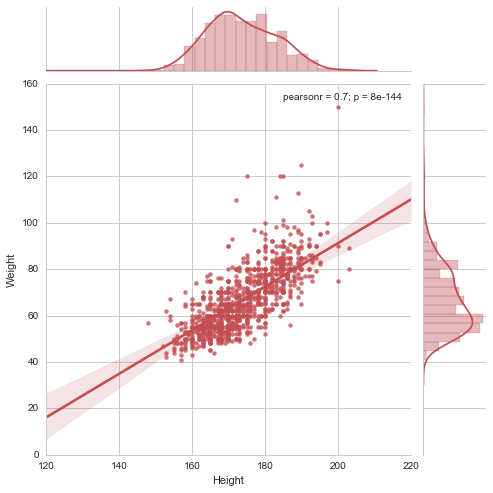

In [86]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot("Height", "Weight", data=young_df, kind="reg", xlim=(120, 220), ylim=(0, 160), color="r", size=7)

Теперь обратимся к образованию опрашиваемы, что гораздо больше будет влиять на ответы, нежели вес и рост :) 

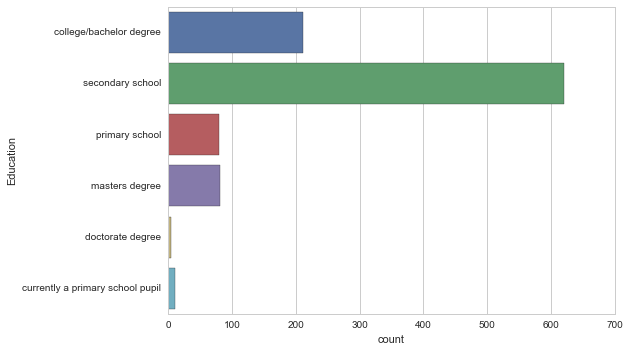

In [89]:
sns.set(style="whitegrid")
sns.countplot(y="Education", data=young_df)

Из диаграммы очевидно, что большинство респондентов имеют полное среднее образование.

Перейдём к результатам исследования.
Респондентам предлагалось оценить своё отношение к музыке жанра Metal или Hardrock, где 1 соответствует ответу "совсем не нравится", а 5 - "нравится очень сильно". Собственно по оси абсцисс отложены ответы, а по оси ординат возраст респондентов. Также диаграмма разбивает ответы респондентов по гендерному принципу.

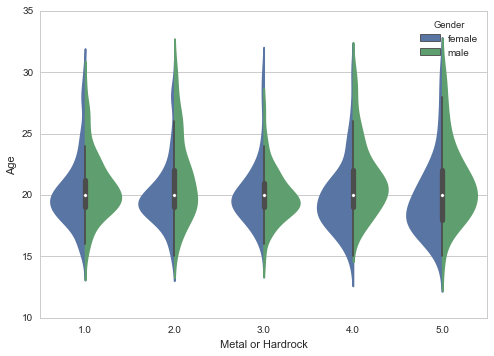

In [90]:
sns.set(style="whitegrid")
sns.violinplot(x="Metal or Hardrock", y="Age", hue="Gender", data=young_df, split=True)

Интересные интересности

Заметим, ответ 5 среди женщин давали девушки младше 20 лет, в то время как в любви к данному жанру признавались мужчины более старшего возраста.

В своём исследовании студенты интересовались предпочтениями не только относительно фильмов, но и музыки. Но прежде чем переходить к оцениванию каждого жанра, студенты задавали общий вопрос, либит ли респондент смотреть фильмы/слушать музыку. Как и в прошлый раз ответы конвертировались в 5-ти балльную шкалу, где 5 - "я очень люблю смотреть фильмы/слушать музыку" и 1 наоборот.

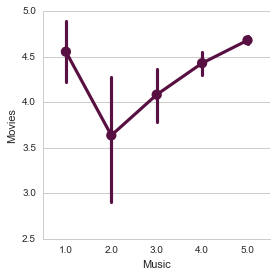

In [22]:
sns.set(style="whitegrid")
sns.factorplot(x="Music", y="Movies", data=young_df, color=sns.xkcd_rgb["plum"])

Получается по результатам исследования, что те, кто не любят музыку, любят смотреть фильмы, а дальше мы видим практически прямую зависимоть любви к фильмам и музыки.

Существует мнение, что люди, выросшие в семье с несколькими детьми, больше склонны тратить на благотворительность, чем те, которые были единственными детьми в семье. 

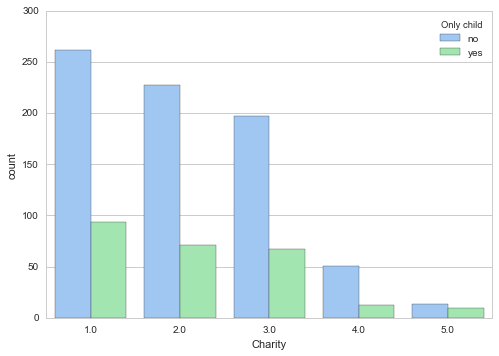

In [26]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.countplot(x="Charity", hue=("Only child"), data=young_df)

Несмотря на то, что распределиние оценок в процентном соотношении практически одинаковое среди тех, кто был единственном в семье и нет, ответили, что много учатсвуют в благотворительности примерно одинаковое количество человек.

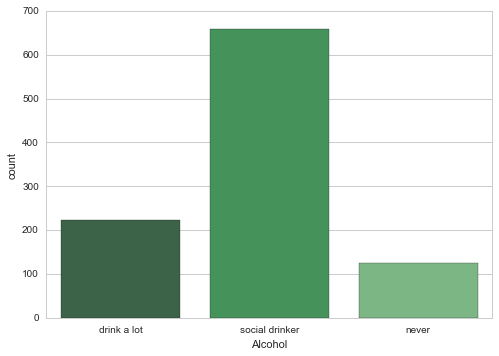

In [28]:
sns.set(style="whitegrid")
sns.countplot(x="Alcohol", data=young_df, palette="Greens_d")

Судя по гистограмме, большинство из опрошенных употребляют алкоголь в компании, тем не менее никогда не пили меньше, чем те, кто пьют много.

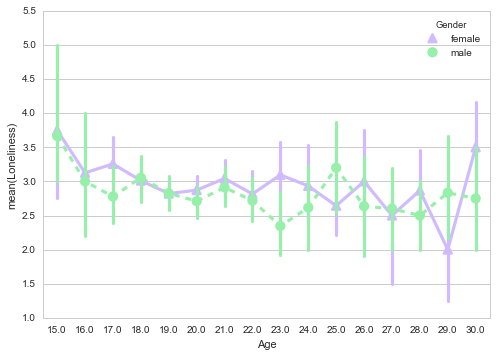

In [29]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.pointplot(x="Age", y="Loneliness", hue="Gender", data=young_df, 
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

По графику заметно, что девушки в подрастковом возрасте в среднем боятся одиночества больше, чем более старшие, хотя в 30 лет ситуациия меняется и одиночество снова становится одним из основных страхов.

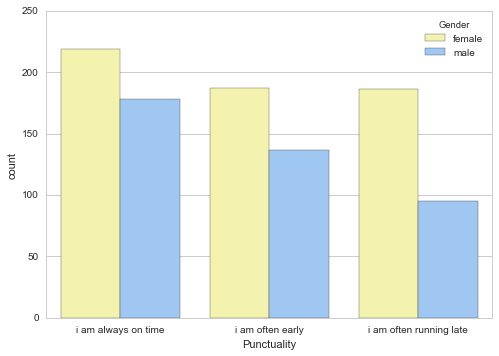

In [31]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.countplot(x="Punctuality", hue="Gender", data=young_df, palette={"male": "b", "female": "y"})

Хотя распределение опрашиваемых, в зависимости их ответа на вопрос о пунктуальности, среди мужчин и женщин практически одинаковое, жещины как много опаздвают и также много приходят раньше назначенного времени.

Исследователи попросили оценить по пятибальной шкале, то сколько респоденты тратят на одежду, гаджеты и здоровое питание.

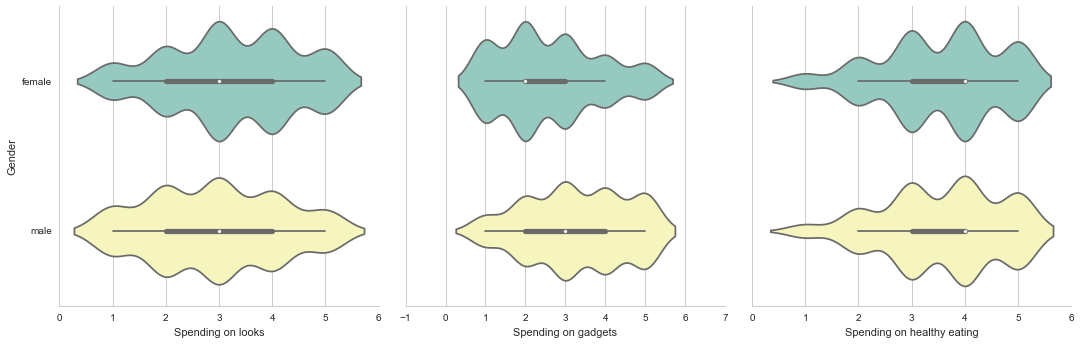

In [32]:
g = sns.PairGrid(x_vars=["Spending on looks", "Spending on gadgets", "Spending on healthy eating"],
                 y_vars=["Gender"], data=young_df,
                 aspect=1, size=5)
g.map(sns.violinplot, palette="Set3")


Получается математическое ожидание трат на гаджеты среди мужчин больше, чем женжины, при этом мат. ожидание трат на одежду и питание среди женщин и мужчин равны.

Студенты также интересовались увлечениями участников исследования. Собственно они просили проставить оценки увлечениям, где 1 - совсем не интересуюсь, 5 - люблю заниматься.

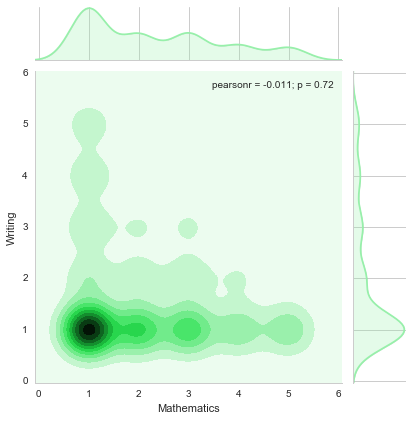

In [33]:
sns.jointplot("Mathematics", "Writing", data=young_df, kind="kde", color="g")

Большинство опрашиваемых не интересуются ни математикой, ни письмом. Однако если им интересна одна категория, то скорее всего не будут интересоваться другой.

## Задача 2. Занудная симуляционная задача. 
Пусть $X_i$ независимы и равномерны на $[0; 1]$. 

Нарисуем гистограммы распределения для $X_1$, $X_1 + X_2 + X_3$, $\sum_{i=1}^{10} X_i$, $\sum_{i=1}^{50} X_i$

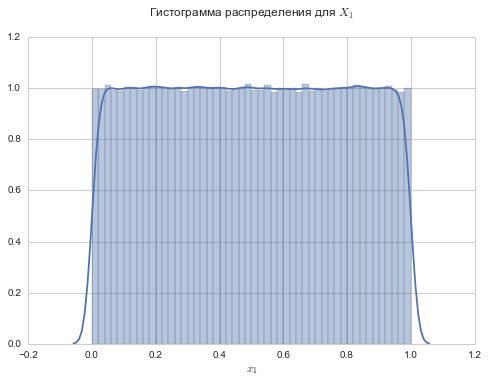

In [4]:
import scipy.stats as stat
X = stat.uniform(loc=0,scale=1)
val1 = X.rvs(1000000)
sns.set(style="whitegrid")
sns.plt.title('Гистограмма распределения для $X_1$', y=1.05)
sns.distplot(val1, axlabel='$x_1$')

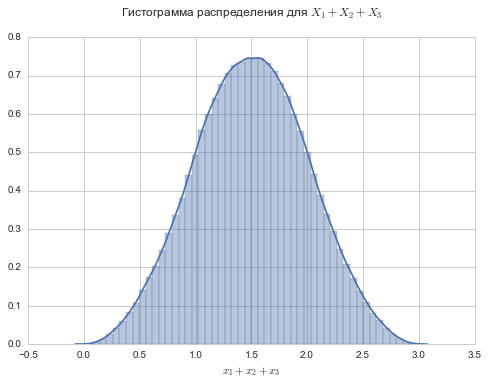

In [5]:
val2 = X.rvs(1000000)
val3 = X.rvs(1000000)
sns.plt.title('Гистограмма распределения для $X_1+X_2+X_3$', y=1.05)
sns.distplot(val1+val2+val3, axlabel='$x_1 + x_2 + x_3$')

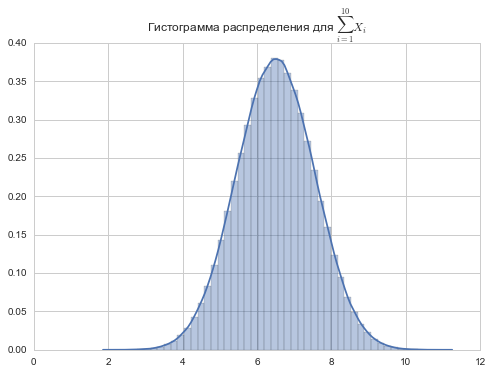

In [6]:
s10 = np.empty(shape=1000000)
for i in range(10):
    val10 = X.rvs(1000000)
    s10 += val10
    
sns.plt.title('Гистограмма распределения для $\sum_{i=1}^{10} X_i$', y=1.02)
sns.distplot(s10)

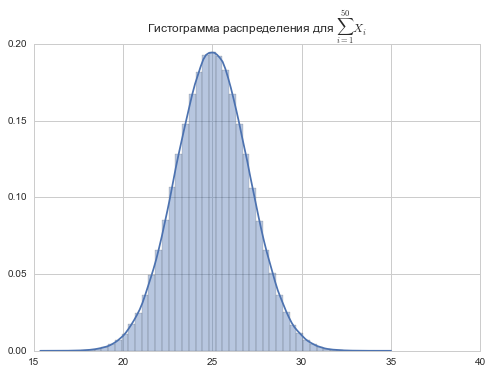

In [10]:
s50 = np.empty(shape=1000000)
for i in range(50):
    val50 = X.rvs(1000000)
    s50 += val50
    
sns.plt.title('Гистограмма распределения для $\sum_{i=1}^{50} X_i$', y=1.02)
sns.distplot(s50)

$P (X_1 + X_2 + X_3 > 2)$

In [15]:
np.sum((val1+val2+val3) > 2) / 1000000

0.16662299999999999

$E(X_1^5)$

In [16]:
np.mean(val1 ** 5)

0.16637007957708344

$Var(\dfrac{X_1}{1 + X_2^2})$

In [17]:
(val1 / (1 + val2 ** 2)).var()

0.060073262610490501

Найдём медиану $\dfrac{1+X_1}{3 + X_2}$

In [18]:
np.median((1 + val1) / (3 + val2))

0.42856137167332609

и  $25\%$-ую квантиль

In [11]:
np.percentile(a=((1 + val1) / (3 + val2)), q=25)

0.35724634371461023

## Задача 3. Задача о Разборчивой Невесте, Secretary problem

Условие

К Разборчивой невесте выстроилась вереница из $n>>0$ потенциальных женихов. Разборчивая невеста хочет выбрать самого богатого из них и только его! Потенциальные женихи заходят к Разборчивой невесте по одному в случайном порядке. Невеста неплохо разбирается в богатстве и всегда может ранжировать всех, с кем она общалась, по величине богатства. Когда к Разборчивой невесте приходит очередной претендент, она должна сразу принять решение: выбрать данного кандидата или перейти к следующему. Вернуться к предыдущим кандидатам невозможно — они обижаются и уезжают.
1. Как выглядит оптимальная стратегия Разборчивой невесты? Чему равна вероятность выбора самого богатого жениха Разборчивой невестой?

Решение

Пусть:
    $n$ - количество потенциальных женихов,
    $t$ - номер шага, на котором находится невеста
    $G_t$ - вероятность того, что $t$-ый жених лучше всех предыдущих,
    $F_t$ - вероятность того, что пропустив $t$ женихов и дальше пользуюясь оптимальной
    стратегией (предполагается, что невеста будет пользоваться предложенной стратегией с $t+1$ 
    шага), невеста выберет в мужья самого богатого.

Определим вероятность $G_t$. Очевидно, что $G_n = 1$. Тогда вероятность того, что $n$-ый жених будет лучше всех предыдущих, равна  $\dfrac{1}{n}$ $\Rightarrow$ $G_{n-1}=1-\dfrac{1}{n}=\dfrac{n-1}{n}$ - вероятность "победы" на $n-1$ шаге. Пользуемся дальше подобной логикой. $\dfrac{1}{n-1}$ - вероятность того, что $n-1$ жених лучше $n-2\Rightarrow$ вероятноть того, что $n-1$ будет не лучше $n-2$ равна $1-\dfrac{1}{n-1}=\dfrac{n-2}{n-1}\Rightarrow G_{n-2}= \dfrac{1}{n-1}*0+\dfrac{n-2}{n-1}*G_{n-1}=\dfrac{n-2}{n}$. Используя метод математической индукции получаем, что $G_t=\dfrac{t}{n}$.

Теперь найдём $F_t$. Для этого стоит уточнить, что Разборчивая невеста будет пользоваться оптимальной стратегией с $t+1$ шага, то есть всех предыдущих женихов она сразу отвергает. И ещё очень важно заметить, что вероятность успеха невесты в её нелёгком деле не превышает величины $F_t \Rightarrow F_{t+1} \le F_t \Rightarrow F_t$ - убываюшая последовательность. Из всего вышесказанного делаем вывод, что $F_n = 0$, так как отвергнув последнего жениха, невеста останется одна $\Rightarrow F_{n-1}=\dfrac{1}{n}$ - вероятность, что $n$-ый жених лучше всех. Тогда $F_{n-2}=\dfrac{1}{n-1}*\dfrac{n-1}{n}+\dfrac{n-2}{n-1}*\dfrac{1}{n}=\dfrac{(n-2)+(n-1)}{n(n-1)}$. В данном случае сразу найти итоговый $F_t$ затрруднительно, поэтому рассмотрим величину $\dfrac{F_t}{G_t}$, тем более нам всё равно придётся сравнивать дальше эти величины. Получается, что $\dfrac{F_{n-2}}{G_{n-2}}=\dfrac{1}{n-1}+\dfrac{1}{n-2}$ $\Rightarrow$ по методу математической индукции $F_t = \dfrac{t}{n} * (\dfrac{1}{t}+\dfrac{1}{t+1}+...+\dfrac{1}{n-1})$.

Перейдём к самой стратегии. Представим, что $F_t$ и $G_t$ непрервыные функции(хотя это не так, потому что они зависят от целых чисел). Тогда $F_t$ - монотонно убывающая функция, а $G_t$ монотонно возрастающая и изобразить их в осях $t, P$, где $P$ - вероятность и $E(G_t)=E(F_t)=[0;1]$ ($E$ - область значения), то найдётся такая точка $T$, в которой эти графики пересекутся $\Rightarrow$ надо найти ближайшее целое $t_1$, до которого невеста пропустит всех женихов, а дальше остановится на первом же, который луше всех предыдущих.

Для того, чтобы найти это оптимальное $t_1$, необходимо рассмотреть соотношение $\dfrac{F_t}{G_t}$ и сравнить его с $1$. Получается, что $\dfrac{F_t}{G_t}= \dfrac{1}{t}+\dfrac{1}{t+1}+...+\dfrac{1}{n-1}$, для $t \ge t_1$. 

Предположим, что $n, t$ - достаточно большие числа, которые позволят нам перейти к рассматриванию функций. Заметим, что если нарисовать график $y=\dfrac{1}{x}$, отметить точки $t, t+1,..., n$ и нарисовать прямоугольники с длиной соответствующей  $\dfrac{1}{t}, \dfrac{1}{t+1},...,\dfrac{1}{n}$ и шириной $1$, то сумма площадей этих прямогольников будет соответствовать $S = \dfrac{1}{t}+\dfrac{1}{t+1}+...+\dfrac{1}{n-1}$.

Если произвети сжатие и растяжение функции $y=\dfrac{1}{x}$ в t раз, величина $\dfrac{1}{t}$ станет очень маленькой $\Rightarrow$ сумма площадей прямоугольников практически в точности будет соответствовать площади под графиком на отрезке $[t, n]$. Заметим, что равенство $S(xy)=S(x)+S(y)$ выполняется для всех $x, y>1$, что соответсвует одмому из свойств логарифмов $\Rightarrow S(x)=log_a(x)\Rightarrow$ для обратой функциии будет выполняться $H(x+y)=H(x)*H(y)\Rightarrow$ это показательная функция $H(x)= a^x$. В итоге получаем, что $a$ - это то самое число, которое нам надо узнать для того, чтобы найти $S(x)$. Так как $H(1)=a \Rightarrow F(a)=1 \Rightarrow$ рассмотрим различные значение пложади под $y=\dfrac{1}{x}$. $S(2)<1\Rightarrow a>2, S(2,5)<1 \Rightarrow a>2,5 , S(3)>1 \Rightarrow a<3 \Rightarrow$ интуитивно понятно, что $a = e$.
В итоге имеем, что $\dfrac{F_t}{G_t}=1 \Leftrightarrow dfrac{n}{t}=e \Leftrightarrow \dfrac{t}{n}=\dfrac{1}{e}\Rightarrow F_t=G_t=\dfrac{t}{n}=\dfrac{1}{e}\Rightarrow$ вероятность "успеха" невесты найти самого богатого $\dfrac{1}{e}\approx 0,368$.
А оптимальная стратегия такова: пропустить $\approx 36,8\%$ женихов и выбрать первого же, который будет лучше всех своих предшественников.